In [1]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data generation (a n-dimensional 0/1-vector with k 1's)
def get_input(n, k):
    x = np.zeros(n, dtype=int)
    for i in range(k):
        x[i] = 1
    np.random.shuffle(x)
    return x

In [3]:
# Utility measure (F-score between two truth (x) and estimation (y), both binary vectors)
def get_Fscore(x, y):
    tp = np.sum(np.multiply(x,y))
    if tp == 0:
        fscore = 0
    else:
        pcp = np.sum(y)
        cp = np.sum(x)
        precision = tp / pcp
        recall = tp / cp
        fscore = 2 * precision * recall / (precision + recall)
    return fscore

In [4]:
# Sparse vector technique (two-parameter version specialized for binary vectors)
def SVT(x, c, b, thr = 0.5):
    y = np.zeros_like(x)
    count = 0
    b1 = b / (1 + (2*c)**(1/3))
    b2 = b - b1
    rho = np.random.laplace(scale=b1)
    for i in range(len(x)):
        nu = np.random.laplace(scale=b2)
        if x[i] + nu >= thr + rho:
            y[i] = 1
            count += 1
            if count >= c:
                return y
    return y

# TODO: try to optimize the threshold for 0/1 vectors!

In [5]:
# Compute the privacy given the hyper-parameters
def get_epsilon(c, b):
    eps = (1 + (2*c)**(1/3))*(1 + (2*c)**(2/3)) / b
    return eps

In [6]:
# Estimate the utility given a problem setting and hyper-parameters
def get_utility(n, k, c, b, R=50, thr=0.5):
    scores = list()
    for i in range(R):
        x = get_input(n, k)
        y = SVT(x, c, b, thr=thr)
        scores.append(1-get_Fscore(x, y))
    return np.average(scores), np.std(scores)

In [7]:
n = 100
k = 10
c = 5
b = 0.1
print(get_epsilon(c, b))
print(get_utility(n, k, c, b, R=50))

177.96023523644658
(0.33333333333333337, 0.0)


In [8]:
def compute_outputs(X, n=100, k=10, R=50, thr=0.5):
    '''
    Computes the privacy 
    
    X = [c,b]
    '''
    
    num_samples = X.shape[0]
    epsilon = np.zeros((num_samples,1))
    utility = np.zeros((num_samples,1))
    
    for k in range(num_samples):
        epsilon[k,0] = get_epsilon(X[k,0],X[k,1])
        utility[k,0] = get_utility(n, k, X[k,0],X[k,1], R=R, thr=thr)[0]
    
    return epsilon, utility
        
    

In [25]:
import matplotlib.pyplot as plt

def plot_epsilon(c_range, b_range):
    fig = plt.figure(figsize=(8, 8))
    eps = np.zeros((len(c_range), len(b_range)))
    for i in range(len(c_range)):
        for j in range(len(b_range)):
            eps[i,j] = get_epsilon(c_range[i], b_range[j])
    im = plt.imshow(np.log(eps), extent=[b_range[0],b_range[-1],c_range[0],c_range[-1]], interpolation='bilinear', origin='lower', aspect='auto')
    plt.xlabel('b')
    plt.ylabel('c')
    fig.colorbar(im)

In [26]:
def plot_utility(n, k, c_range, b_range, R=50, thr=0.5):
    fig = plt.figure(figsize=(8, 8))
    scores = np.zeros((len(c_range), len(b_range)))
    for i in range(len(c_range)):
        for j in range(len(b_range)):
            score_avg, _ = get_utility(n, k, c_range[i], b_range[j], R=R, thr=thr)
            scores[i,j] = score_avg
    im = plt.imshow(scores, extent=[b_range[0],b_range[-1],c_range[0],c_range[-1]], interpolation='bilinear', origin='lower', aspect='auto')
    plt.xlabel('b')
    plt.ylabel('c')
    fig.colorbar(im)

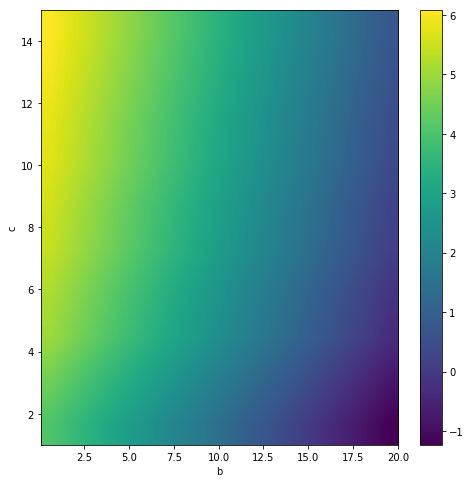

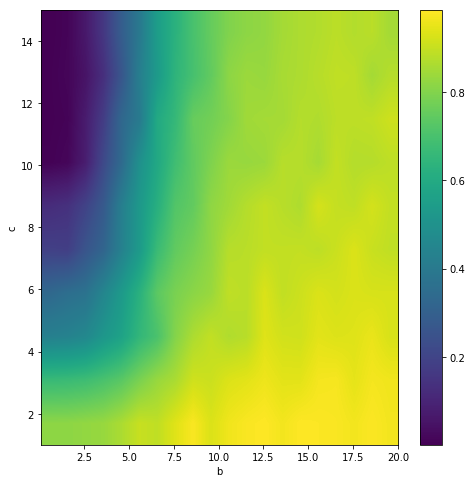

In [27]:
n = 100
k = 10
c_range = np.linspace(1, 15, num=10, dtype=int)
b_range = np.geomspace(0.1, 20, num=20)
plot_epsilon(c_range, b_range)
plot_utility(n, k, c_range, b_range)